In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
# Load CSV or data
df = pd.read_csv(r"C:\Users\bargotah\Downloads\output_nov27\FE_Color.csv")

# Check for missing values
print(df.isnull().sum())

# Inspect data types
print(df.info())


Seed No. per image            0
Class                         0
Area-SAM(mm2)                 0
Length-SAM(mm)                0
Width-SAM(mm)                 0
Perimeter-SAM(mm)             0
Area-SAM_taubin(mm2)          0
Length-SAM_taubin(mm)         0
Width-SAM_taubin(mm)          0
Perimeter-SAM_taubin(mm)      0
Area-SAM_minEnc(mm2)          0
Length-SAM_minEnc(mm)         0
Width-SAM_minEnc(mm)          0
Perimeter-SAM_minEnc(mm)      0
centroid-0                    0
centroid-1                    0
bbox-0                        0
bbox-1                        0
bbox-2                        0
bbox-3                        0
Area-SAM(pix)                 0
Eccentricity                  0
Equivalent diameter area      0
Perimeter(pix)                0
solidity                      0
area_convex                   0
extent                        0
Axis Major Length-SAM(pix)    0
Axis Minor Length-SAM(pix)    0
Aspect Ratio                  0
Roundness                     0
Compactn

In [3]:
df.describe()

,Seed No. per image,Area-SAM(mm2),Length-SAM(mm),Width-SAM(mm),Perimeter-SAM(mm),Area-SAM_taubin(mm2),Length-SAM_taubin(mm),Width-SAM_taubin(mm),Perimeter-SAM_taubin(mm),Area-SAM_minEnc(mm2),...,Axis Major Length-SAM(pix),Axis Minor Length-SAM(pix),Aspect Ratio,Roundness,Compactness,Circularity-SAM,Shapefactor1,Shapefactor2,Shapefactor3,Shapefactor4
count,4234.000000,4.234000e+03,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,...,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000
mean,3.798063,4.717932e+04,34.907821,25.810823,128.043145,137.099198,15.014973,10.926372,43.436821,125.689306,...,361.697157,263.270709,1.370416,0.855362,0.855259,1.169737,0.005238,0.003856,0.732944,0.996311
std,2.757476,7.485736e+05,316.578991,218.418876,1366.315034,72.724844,4.205587,2.799119,11.660015,66.120375,...,98.535900,65.740804,0.124762,0.019831,0.038413,0.027751,0.004834,0.002894,0.065716,0.003073
min,0.000000,3.618402e-02,0.283743,0.167759,0.627266,0.036283,0.287190,0.166223,0.663751,0.035097,...,7.386254,4.275112,1.025826,0.715092,0.700259,0.966274,0.002346,0.001821,0.490363,0.967720
25%,1.000000,8.054105e+01,11.290775,9.119410,32.367539,80.616983,11.755094,8.796541,34.327037,74.516146,...,284.289332,212.100724,1.283832,0.844505,0.829591,1.150949,0.004168,0.002987,0.688221,0.995286
50%,3.000000,1.230665e+02,14.148918,11.150687,40.090990,123.145073,14.757108,10.692577,42.502995,112.885208,...,355.010858,257.649486,1.364269,0.857689,0.854849,1.165924,0.004960,0.003598,0.730767,0.997172
75%,6.000000,1.759325e+02,16.927856,13.325088,47.986708,174.922910,17.690136,12.683335,50.860468,159.690267,...,428.084837,306.611530,1.448423,0.868848,0.880878,1.184126,0.006023,0.004495,0.775946,0.998328
max,10.000000,1.698393e+07,6229.450376,4552.191200,28058.153417,458.144867,29.476667,22.482575,81.846152,421.472858,...,702.301268,545.682978,2.012760,1.034903,0.984079,1.398421,0.307761,0.178130,0.968412,0.999891


In [4]:
#removing the artifacts
data = df[df['Area-SAM(mm2)'] >= 5]
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4233 entries, 0 to 4233
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Seed No. per image          4233 non-null   int64  
 1   Class                       4233 non-null   object 
 2   Area-SAM(mm2)               4233 non-null   float64
 3   Length-SAM(mm)              4233 non-null   float64
 4   Width-SAM(mm)               4233 non-null   float64
 5   Perimeter-SAM(mm)           4233 non-null   float64
 6   Area-SAM_taubin(mm2)        4233 non-null   float64
 7   Length-SAM_taubin(mm)       4233 non-null   float64
 8   Width-SAM_taubin(mm)        4233 non-null   float64
 9   Perimeter-SAM_taubin(mm)    4233 non-null   float64
 10  Area-SAM_minEnc(mm2)        4233 non-null   float64
 11  Length-SAM_minEnc(mm)       4233 non-null   float64
 12  Width-SAM_minEnc(mm)        4233 non-null   float64
 13  Perimeter-SAM_minEnc(mm)    4233 non-n

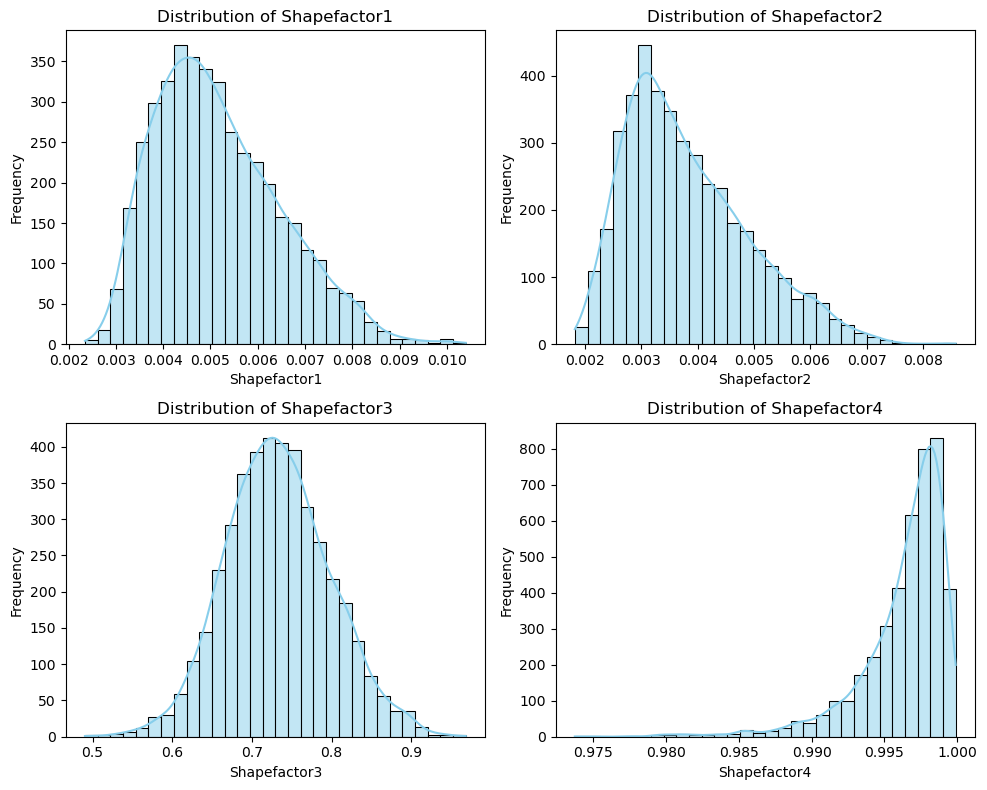

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes = axes.flatten()

shapefactors=data[['Shapefactor1', 'Shapefactor2', 'Shapefactor3', 'Shapefactor4']]
for i, sf in enumerate(shapefactors):
    sns.histplot(data[sf], bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {sf}')
    axes[i].set_xlabel(sf)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig("shape_beans.jpg", format='jpg', dpi=600, bbox_inches='tight') 
plt.show()


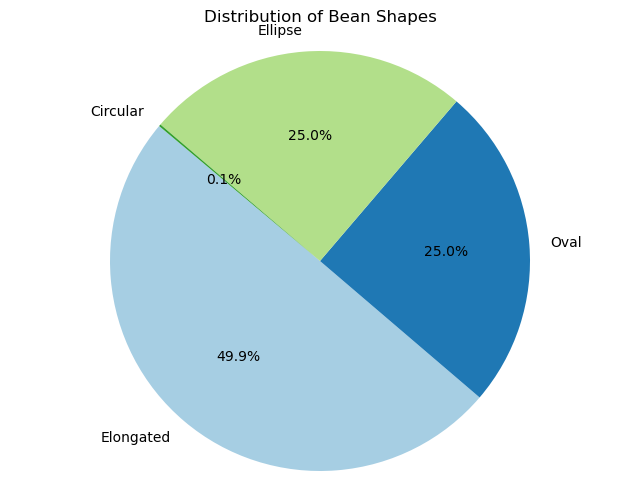

In [6]:
# Split each string by comma and flatten into a single list
all_shapes = [s.strip() for row in data['Shape'] for s in row.split(',')]

# Count occurrences of each unique shape
shape_counts = pd.Series(all_shapes).value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    shape_counts,
    labels=shape_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Distribution of Bean Shapes')
plt.axis('equal')  # Ensure pie is circular
plt.show()


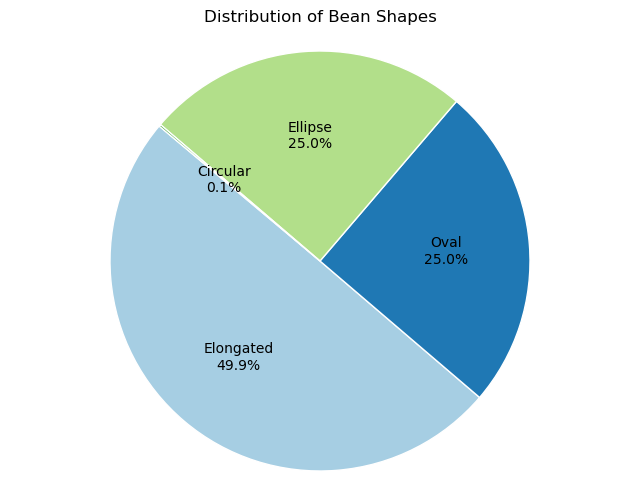

In [7]:
# Split each string by comma and flatten into a single list
all_shapes = [s.strip() for row in data['Shape'] for s in row.split(',')]

# Count occurrences of each unique shape
shape_counts = pd.Series(all_shapes).value_counts()

# Function to display both label and percentage inside the slice
def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return "{:s}\n{:1.1f}%".format(allvals.index[allvals==absolute][0], pct)

# Plot pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    shape_counts,
    labels=None,  # labels will be shown inside via autopct
    autopct=lambda pct: f'{pct:.1f}%',  # We'll replace this next
    startangle=140,
    colors=plt.cm.Paired.colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Add labels inside slices
for i, a in enumerate(autotexts):
    a.set_text(f"{shape_counts.index[i]}\n{a.get_text()}")
    a.set_color('black')  # text color inside slices
    a.set_fontsize(10)

plt.title('Distribution of Bean Shapes')
plt.axis('equal')  # Ensure pie is circular
plt.savefig ("Distribution_bean.JPG", format='jpg', dpi=600, bbox_inches='tight')
plt.show()
